# Milestone 4 - Forest Fires Prediction Analysis
## Author - Salinee Kingbaisomboon
### UW NetID: 1950831

## Instructions
- Update Milestones 1 through 3, and assignment 9 based on feedback;
- Enhance your model results by trying different model and/or data enhancement techniques (Build 3 models with different enhancements and feature engineering techniques);
- Explain your choice of model and model accuracy; and
- Draw direct inferences and conclusions from model results (describe how your model results can improve or provide a solution to the problem you have chosen). Use graphs and evidence from the data to prove your point. Part of being a data scientist is to tell a story that helps the business.

### Note
Please use the <a class="icon-pdf" title="Independent Project Rubric" href="https://library.startlearninglabs.uw.edu/DATASCI410/Handouts/DATASCI%20410%20Independent%20Project%20Rubric.pdf" target="_blank" rel="noopener">Rubric</a> as a general guide for your project.

# Abstract
We all know about the big fire situation in Australia. This milestone will be about **Forest Fires - Prediction & Analysis** to dedicate for this disaster in order to be able to study about forest fire's data analysis and regression model which can be used for the wildfire warnings, watches and behaviors. These model can be a huge aids for evacuation planning and such.  Let's pray for Australia to make it through this crisis!
![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTXJxOtcP3bOr2WYOHe7CPX6moHgDDbmU-BFtybogtJVjnJp93t&s)

## Australia Fire Crisis

Australia is fighting one of its worst bushfire seasons, fuelled by record-breaking temperatures and months of severe drought.

<img src="https://img.republicworld.com/republic-prod/stories/promolarge/xxhdpi/uynnulx0xigw2qkz_1578223790.jpeg?tr=w-812,h-464" width="500"/>

<center><i>Source: https://www.republicworld.com/world-news/rest-of-the-world-news/pray-for-australia-netizens-stand-in-solidarity-amid-raging-bushfir.html</i></center>

Since **September 2019**, at least 25 people have died and thousands have been made homeless. More than 6.3 million hectares (63,000 sq km or 15.6 million acres) have been burned so far.

## How did the Australia fires start?
The main cause of fire ignitions of Australia’s bushfires is dry lightning, essentially lightning from thunderstorms that don’t produce rain, weather and and climate effects.

## Problem
The goal of this milestone is to predict the burned area of forest fires, in the northeast region of Portugal, by using meteorological data such as temperature, relative humidity, wind speed, and Fire Weather Indexes.

**<center>Initial assumption:</center>**

$$ 
X = FFMC, DMC, ISI, temp, RH, wind, rain\\
Y = area
$$

***
### The structure of the  Fire Weather Index (FWI) System:
![](https://www.researchgate.net/profile/Youssef_Safi2/publication/290160237/figure/fig3/AS:325226018689026@1454551333352/The-structure-of-the-Fire-Weather-Index-FWI-system.png)
**<u><font color=blue>Fuel Moisture Codes</font></u>**
1. **Fine Fuel Moisture Code - FFMC:** This is a numerical rating of the moisture content of surface litter and other cured fine fuels. It shows the relative ease of ignition and flammability of fine fuels. The moisture content of fine fuels is very sensitive to the weather. Even a day of rain, or of fine and windy weather, will significantly affect the FFMC rating.
2. **Duff Moisture Code - DMC:** DMC is a numerical rating of the average moisture content of loosely compacted organic layers of moderate depth. The code indicates the depth that fire will burn in moderate duff layers and medium size woody material. Duff layers take longer than surface fuels to dry out but weather conditions over the past couple of weeks will significantly affect the DMC.
3. **Drought Code - DC:** The DC is a numerical rating of the moisture content of deep, compact, organic layers. It is a useful indicator of seasonal drought and shows the likelihood of fire involving the deep duff layers and large logs. A long period of dry weather (the system uses 52 days) is needed to dry out these fuels and affect the Drought Code.

**<u><font color=red>Fire Behaviour Indices</font></u>**
4. **Initial Spread Index - ISI:** This indicates the rate fire will spread in its early stages. It is calculated from the FFMC rating and the wind factor.
5. **Build -Up Index - BUI:** This index shows the amount of fuel available for combustion, indicating how the fire will develop after initial spread. It is calculated from the Duff Moisture Code and the Drought Code.
6. **Fire Weather index - FWI:** Information from the ISI and BUI is combined to provide a numerical rating of fire intensity - the Fire Weather Index.

<i>Source: https://www.pogoda-niesiolowice.kaszuby.pl/fwi/fwistronaen.html</i>
***

## <u>Declare Functions used in this assignment</u>

In [112]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy

import scikits.bootstrap as bootstrap

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn import linear_model
import sklearn.naive_bayes
import sklearn.metrics

import statsmodels.formula.api as sm
import statsmodels.stats.weightstats as ws

from statistics import mean

import warnings

warnings.filterwarnings("ignore") # To suppress warning

%matplotlib inline

In [44]:
# Function to plot the Linear Regression Model's graph
def plot_linear_regression_model(data, x_column, y_column):
    # First initialize the model.
    model = linear_model.LinearRegression()
    
    # Fit the model to the data
    n_points = len(data)
    x_input = data[x_column].values.reshape(n_points, 1)
    y_output = data[y_column].values.reshape(n_points, 1)
    
    model.fit(x_input, y_output)
    
    # Get predictions
    y_pred = model.predict(x_input)

    # Plot output
    plt.scatter(x_input, y_output)
    plt.plot(x_input, y_pred, linewidth=2, color='red')
    plt.grid(True)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title('Linear Regression Plot: ' + x_column + ' vs ' + y_column)
    
    # Print model parameters
    # Get slope (m) and y-intercept (b)
    print('Intercept: {0:.5f}'.format(model.intercept_[0]))
    print('Slope : {0:.5f}'.format(model.coef_[0][0]))

In [346]:
# Function to calculate the estimate of the True Coefficients between a feature and label after Linear Regression fitting
def estimate_true_coefficients(data, x_column, y_column):
    # First initialize the model.
    model = linear_model.LinearRegression()
    
    # Fit the model to the data
    n_points = len(data)
    x_input = data[x_column].values.reshape(n_points, 1)
    y_output = data[y_column].values.reshape(n_points, 1)
    
    model.fit(x_input, y_output)
    
    # Print model parameters
    # Get slope (m) and y-intercept (b)
    print(f'\033[1m\033[4mEstimate True Coefficients of for Linear Regression of {x_column} (Slope) and {y_column} (Intercept)\033[0m')
    print('Intercept: {0:.5f}'.format(model.intercept_[0]))
    print('Slope : {0:.5f}'.format(model.coef_[0][0]))
    print('----------------------------------------------------------------------------------------')

In [22]:
# Function to replace outliers
def replace_outlier(array):
    # The high limit for acceptable values is the mean plus 2 standard deviations 
    LimitHi = np.mean(array) + 2*np.std(array)
    # The low limit for acceptable values is the mean plus 2 standard deviations
    LimitLo = np.mean(array) - 2*np.std(array)
    #  Create Flag for values outside limits 
    FlagBad = (array < LimitLo) | (array > LimitHi)
    
    # FlagGood is the complement of FlagBad
    FlagGood = ~FlagBad
    # Replace outleiers with the mean of non-outliers
    array[FlagBad] = np.mean(array[FlagGood])
    # Return array result
    return array

In [45]:
# Function to replace missing numeric values
def replace_missing_value(x, col):
    # We determine the locations of the question marks
    QuestionMark = x.loc[:, col].astype(str) == "?"
    # If there are question marks
    if sum(QuestionMark) > 0:
        # Convert the current column to numeric data including nans
        x.loc[:, col] = pd.to_numeric(x, errors='coerce')
        # Get the Nan array from the current column
        HasNan = np.isnan(x.loc[:, col]) 
        # Calculate the Median for current column without Nan
        Median = np.nanmedian(x.loc[:, col])
        # Replace the missing value with Median
        x.loc[HasNan, col] = Median
    return x.loc[:, col]

In [81]:
def compute_summary_statistics_bootstrap(data, label):
    # Compute a list of 500 sample means from sample of size 50 from the population distribution
    n_replicas = 500
    n_size = 50
    
    x_means = pd.Series([
            data.sample(n=n_size, replace=True).mean()
            for i in range(n_replicas)])
        
    pop_mean = np.mean(x_means) # sample mean
    pop_std = np.std(x_means) # sample standard distribution
    
    print(f'\033[1m\033[4mSummary Statistics (Bootstrap) of: {label}\033[0m')
    print('Estimated mean (%.3f) vs actual mean (%.3f)' % (pop_mean, np.mean(data)))
    print('Estimated s.d. (%.3f) vs actual s.d. (%.3f)' % (pop_std, np.std(data)))
    print('-----------------------------------------------------')

    return pop_mean, pop_std

In [74]:
def compute_confidence_intervals(data, pop_mean, pop_std, label):
    # Compute the 95% confident interval  
    alpha = 0.95
    half_width = scipy.stats.norm.ppf((1 + alpha)/2, loc=pop_mean, scale=pop_std) - pop_mean
    ci_low = pop_mean - half_width
    ci_high = pop_mean + half_width
    print(f'\033[1m\033[4m95% Confident Intervals (Bootstrap) of: {label}\033[0m')
    print('The half width is %.2f' % half_width)
    print('The actual mean is %.2f' % np.mean(data))
    print('The %.2f level CI is (%.2f , %.2f)' % (alpha, ci_low, ci_high))
    print('-----------------------------------------------------')

In [23]:
# Function to produce the Confusion Matrix
def confusion_matrix(labels, predicted_labels, label_classes):
    return pd.DataFrame(
        sklearn.metrics.confusion_matrix(labels, predicted_labels),
        index=[label_classes], 
        columns=label_classes)  

## <u>Data Source</u>
The data source I used for this milestone is from **UCI Machine Learning Repository**: **Forest Fires Data Set**. 

**URL:** https://archive.ics.uci.edu/ml/datasets/Forest+Fires

The data was collected from the northeast region of Portugal, **Montesinho Natural Park (https://en.wikipedia.org/wiki/Montesinho_Natural_Park)**.

In [24]:
# Location of dataset
filename = 'https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv'

forestfires_df = pd.read_csv(filename)

# Used for counting frequency
forestfires_df['count'] = 1 

# View first five rows of the data frame
forestfires_df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,count
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


## <u>Data Characteristics</u>

### 1. Data Frame Dimensions

In [25]:
forestfires_df.shape

(517, 14)

### 2. Data Frame Data Types

In [26]:
forestfires_df.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
count      int64
dtype: object

### 3. Summary statistics

In [27]:
forestfires_df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,count
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.0
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,1.0
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.0
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,1.0
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,1.0
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,1.0
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,1.0
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.0


**Attribute information:**
1. ~~**X** - x-axis spatial coordinate within the Montesinho park map: 1 to 9~~ <font color=red>**Not used in the model**</font>
2. ~~**Y** - y-axis spatial coordinate within the Montesinho park map: 2 to 9~~ <font color=red>**Not used in the model**</font>
3. ~~**month** - month of the year: "jan" to "dec"~~ <font color=red>**Not used in the model**</font>
4. ~~**day** - day of the week: "mon" to "sun"~~ <font color=red>**Not used in the model**</font>
5. **FFMC** - FFMC index from the FWI system: 18.7 to 96.20 <font color=blue>**(feature)**</font>
6. **DMC** - DMC index from the FWI system: 1.1 to 291.3 <font color=blue>**(feature)**</font>
7. **DC** - DC index from the FWI system: 7.9 to 860.6 <font color=blue>**(feature)**</font>
8. **ISI** - ISI index from the FWI system: 0.0 to 56.10 <font color=blue>**(feature)**</font>
9. **temp** - temperature in Celsius degrees: 2.2 to 33.30 <font color=blue>**(feature)**</font>
10. **RH** - relative humidity in %: 15.0 to 100 <font color=blue>**(feature)**</font>
11. **wind** - wind speed in km/h: 0.40 to 9.40 <font color=blue>**(feature)**</font>
12. **rain** - outside rain in mm/m2 : 0.0 to 6.4 <font color=blue>**(feature)**</font>
13. **area** - the burned area of the forest (in ha): 0.00 to 1090.84 <font color=green>**(label)**</font>

### Why some attributes haven't been used in the model?

### a) X & Y
This data set has **X** and **Y** features but I decide not to used them in the model since both of them didn't have relationship with any features which we can see from the **Pair wise scatter plot** below:

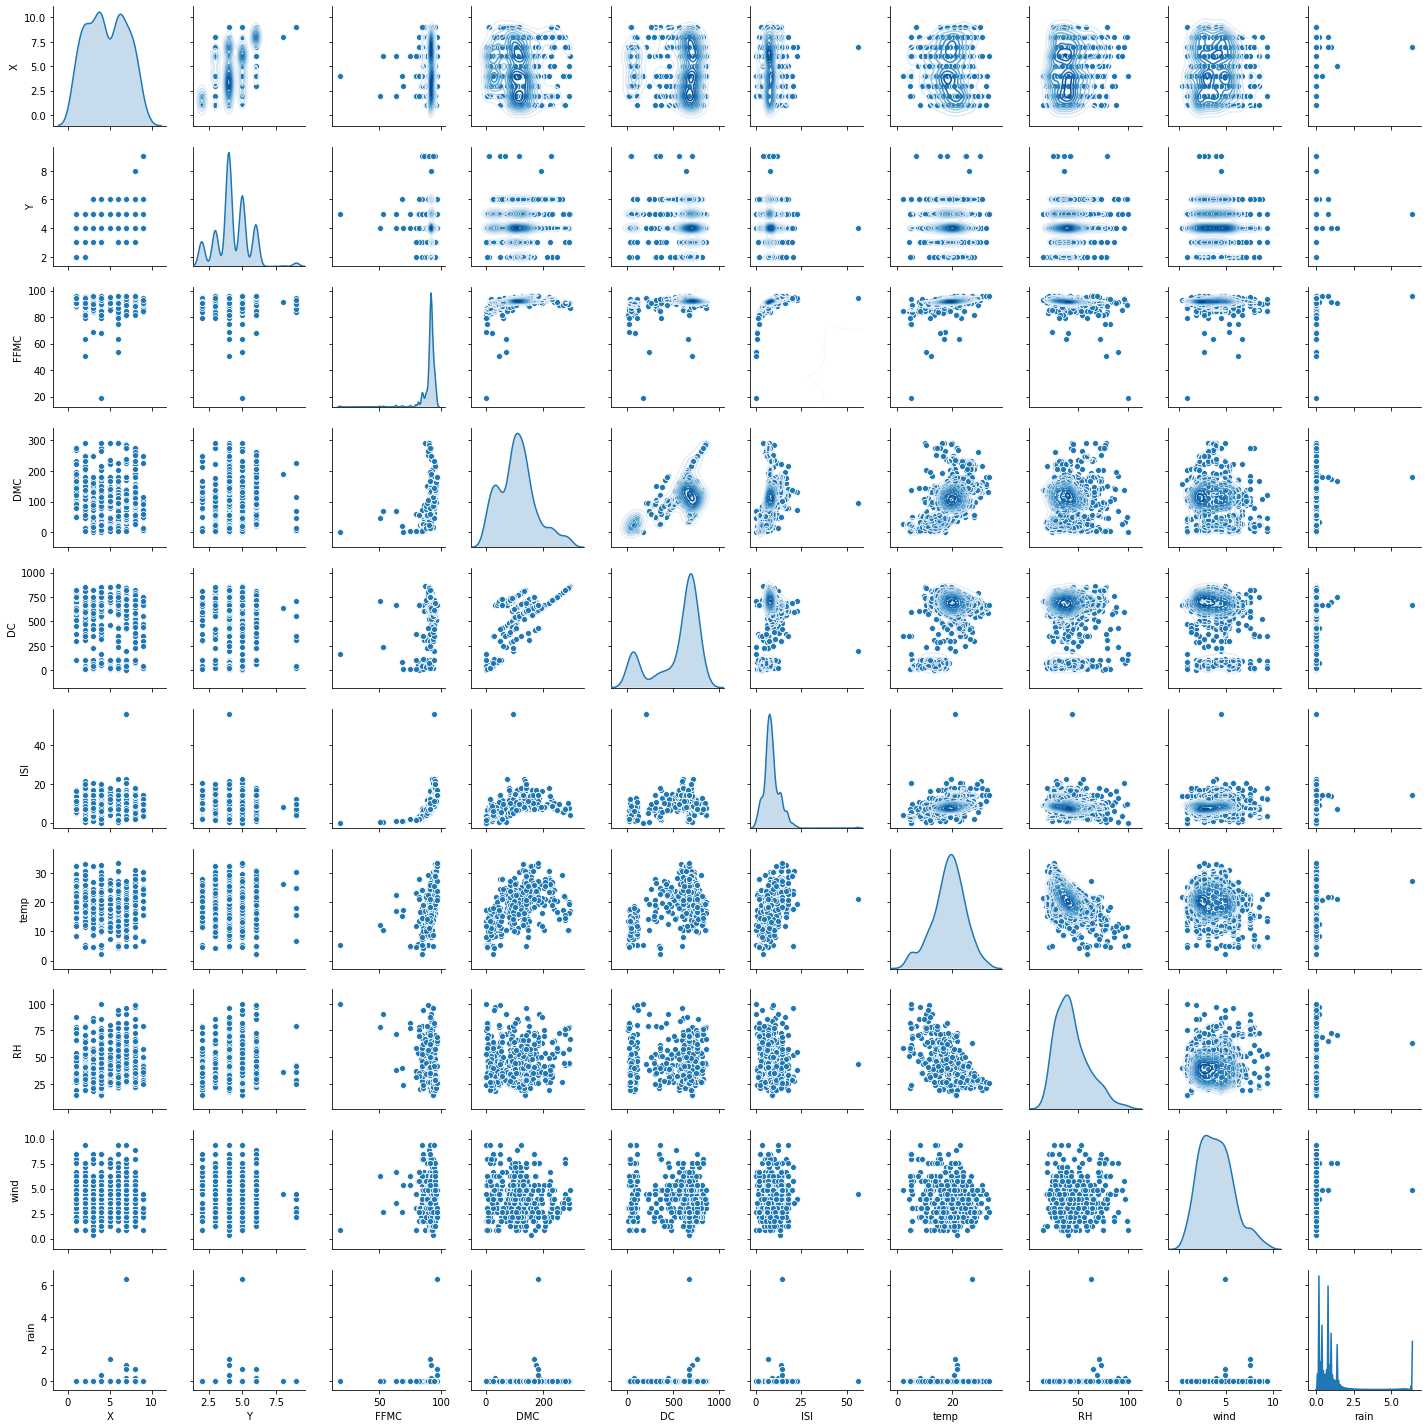

In [28]:
# Plots Pair wise scatters to virtually see the data
num_cols = ['X', 'Y','FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain'] 
sns.pairplot(forestfires_df.loc[:, num_cols],
             palette="seismic", diag_kind="kde", 
             size=2).map_upper(sns.kdeplot, cmap="Blues")

### b) Month & Day
This data set has **month** and **day** features but I decide not to do **Time Series** model since from **Milestone 1, Facet Plots between Month and Day**, we don't have much data on other months but only **August** and **September**. This can introduced a bias in the time series model. Therefore, I won't use them in the prodiction as well.

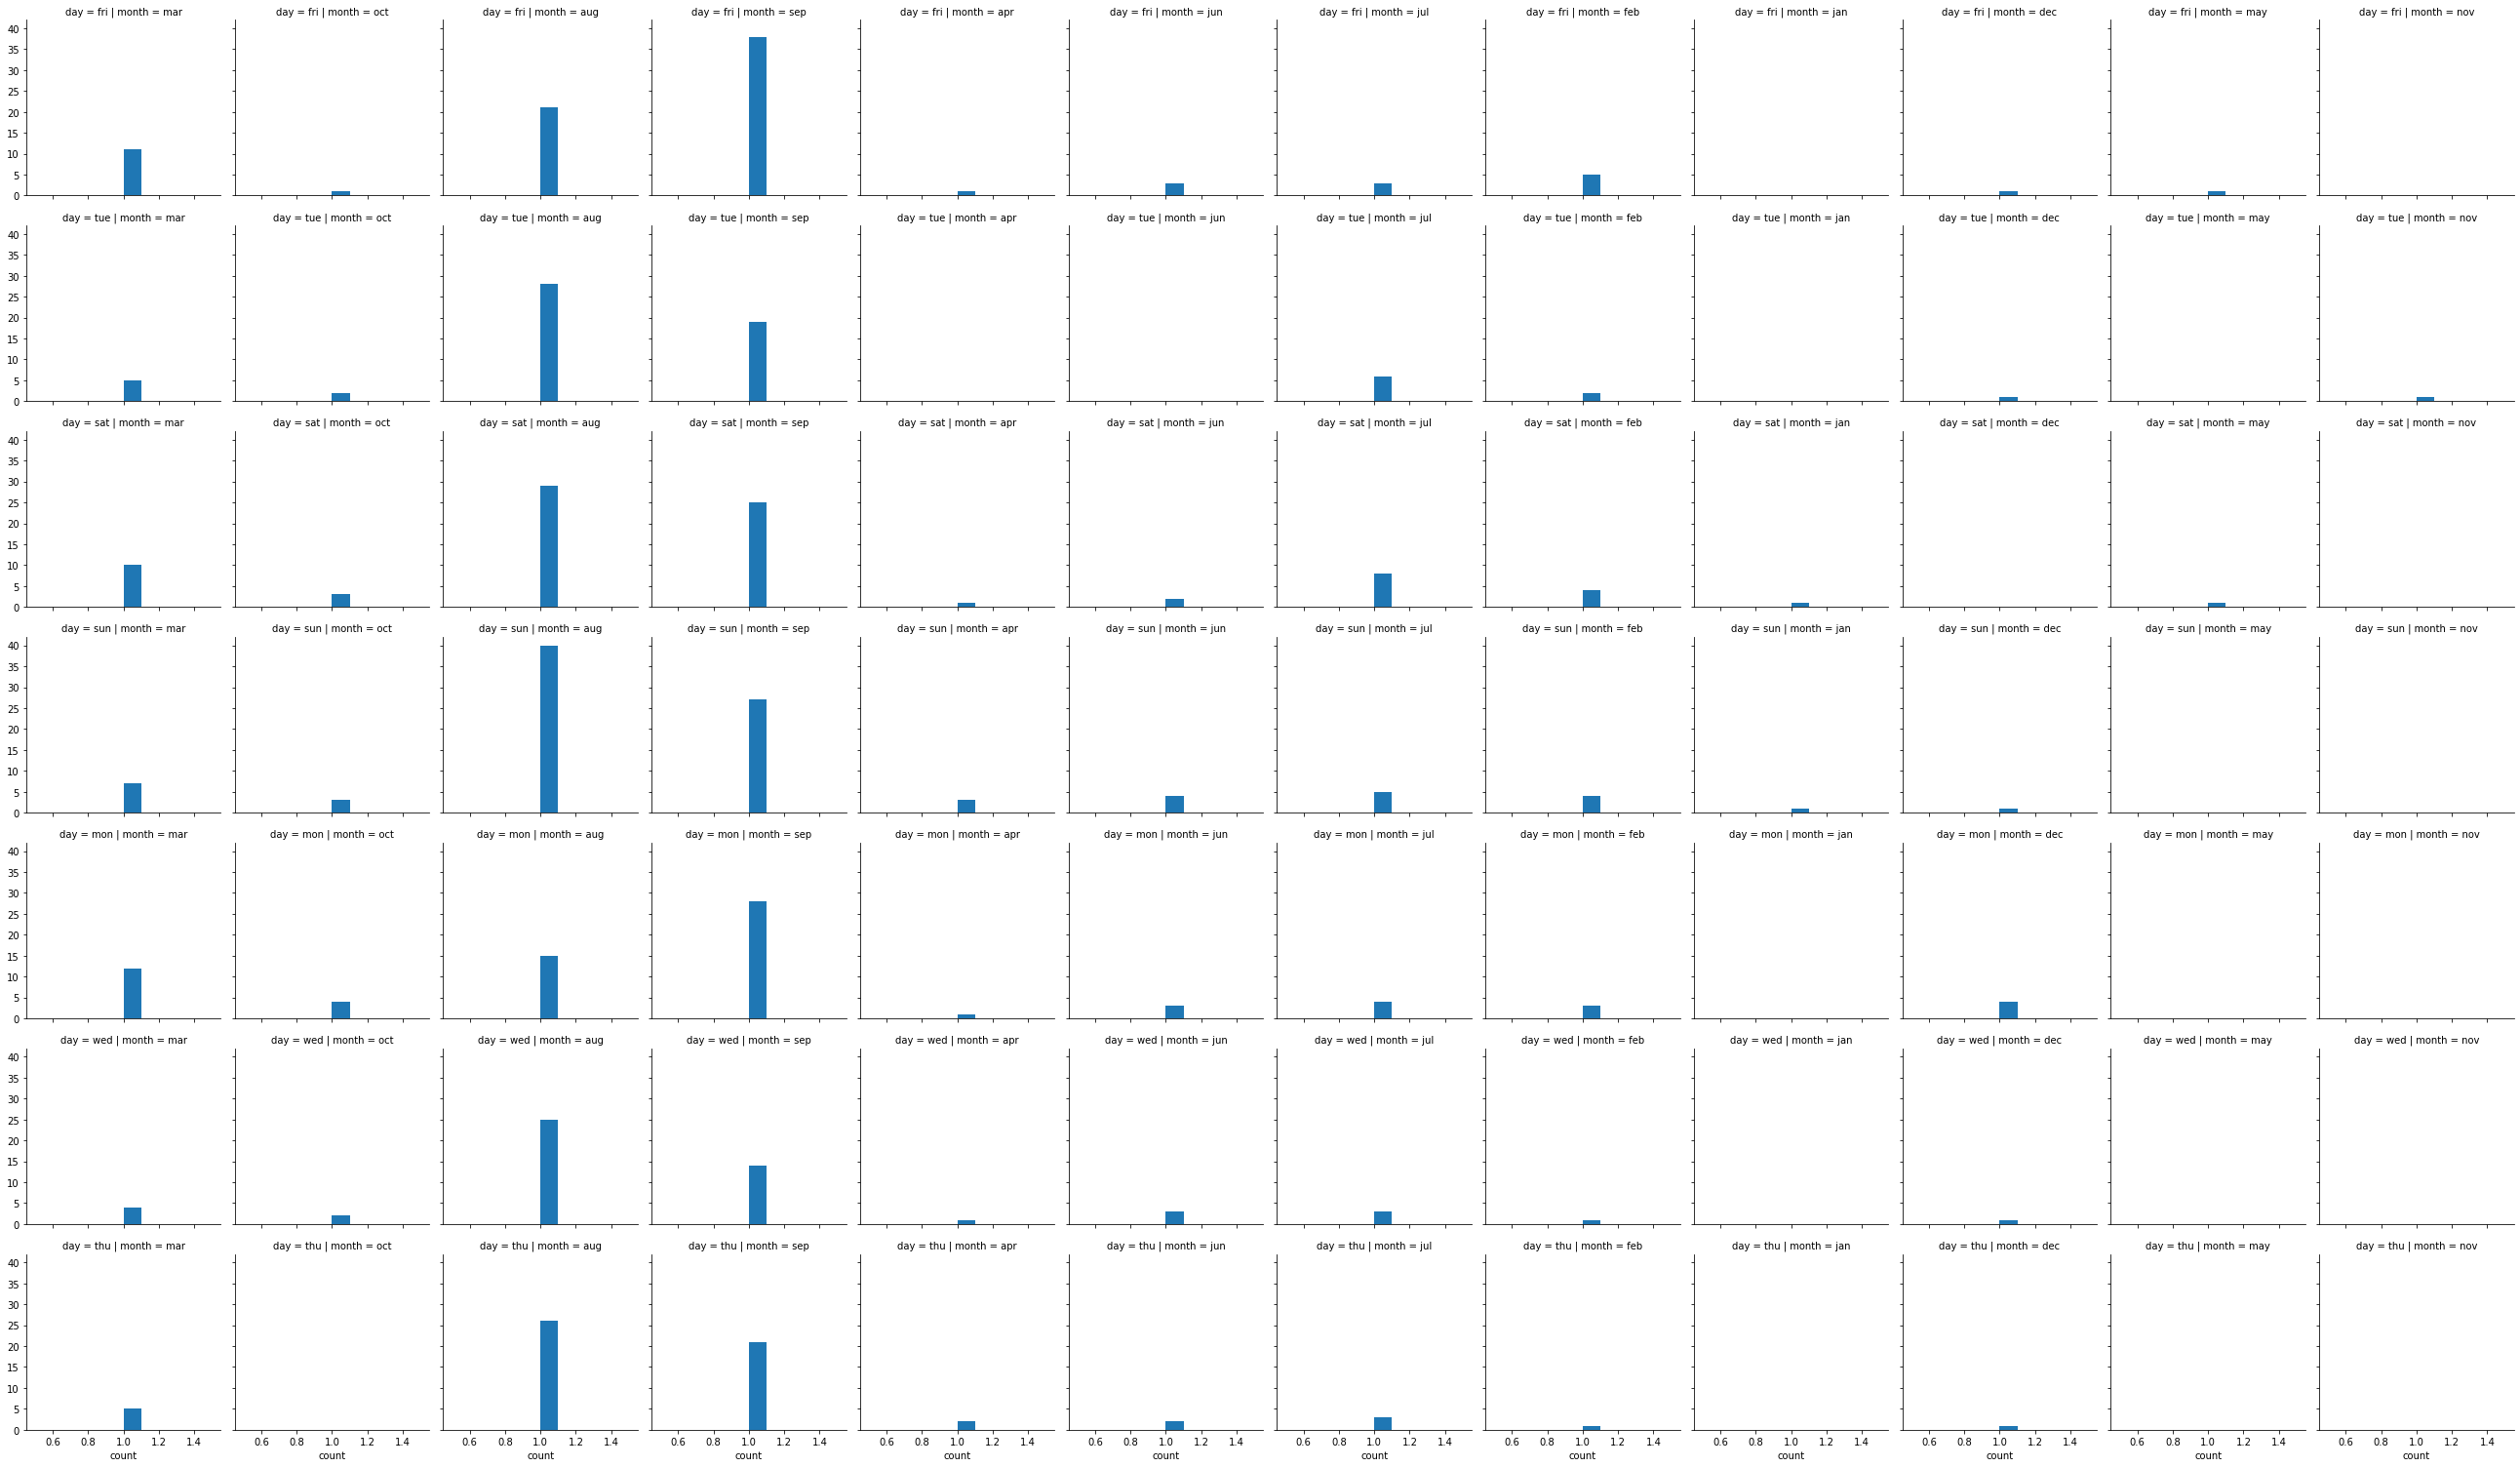

In [29]:
# View this data by Month and Day to virtually see how's our data been collected during the year
g = sns.FacetGrid(forestfires_df, col="month", row='day')
g = g.map(plt.hist, "count")

***
## <u>Steps:</u>
1. Generate and improve the **Regression** models with with different enhancements and feature engineering techniques.
2. Leverage **Naïve Bayes algorithm** to classify build a model in comparison with **Regression** model.
3. Select the best choice of model. Evaluate model performance and accuracy.
4. Draw direct inferences and conclusions from model results.
***

## 1. <u>Regression Model:</u>
### 1.1) Prepared Data
### <u>Steps:</u>
1. Replace any missing values & remove any outliers (especially, **FFMC**, **ISI** and **rain** features - discovered from **Milestone 3**).
2. Normalization all numeric features.
3. Logarithm Transform for **area**.

In [181]:
# Create new copy of original data used for Rehression analysis
regression_df = forestfires_df.copy()

In [182]:
# Replace missing values & outliers. Then Normalize numeric values using scale() function from sklearn.preprocessing
for col in ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']:
    # Replace missing values with Median for current column without Nan
    regression_df.loc[:, col] = replace_missing_value(regression_df, col)
    # Replace the outliers (if exists) by calling "replace_outlier" funtion
    regression_df.loc[:, col] = replace_outlier(regression_df.loc[:, col])
    # Coerce to numeric
    regression_df.loc[:, col] = pd.to_numeric(regression_df.loc[:, col], errors='coerce')
    # Normalization numeric data using scale by scikit library
    regression_df.loc[:, col] = scale(regression_df.loc[:, col])
    
# This output variable (area) is very skewed towards 0.0, thus it may make sense to model with the logarithm transform 
is_area_not_zero = regression_df['area'] > 0.00
area_not_zero = regression_df[is_area_not_zero]
regression_df.loc[is_area_not_zero, 'area'] = np.log(area_not_zero['area'])

# Normalization numeric data using scale by scikit library
regression_df['area'] = scale(regression_df['area'])

In [183]:
# Drop unused columns
Obsolete = ['X', 'Y', 'month', 'day', 'count']
for x in Obsolete:
    regression_df = regression_df.drop(x, axis=1)
    
# Preview the data
regression_df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,-1.810005,-1.430433,-2.272183,-0.970183,-2.359450,6.745906e-01,2.069217,-0.072710,-0.670954
1,-0.237072,-1.260709,0.423861,-0.541200,-0.267277,-6.872518e-01,-2.001355,-0.072710,-0.670954
2,-0.237072,-1.107589,0.507350,-0.541200,-0.993133,-6.872518e-01,-1.720626,-0.072710,-0.670954
3,0.156161,-1.299451,-2.350982,0.075463,-2.338101,-5.375818e-16,0.174296,9.234159,-0.670954
4,-0.701802,-0.967382,-2.235129,0.236332,-1.676291,-5.375818e-16,-1.369714,-0.072710,-0.670954


### 1.2) Plot Linear Regression for each features (to check if the outliers still present)

#### 1.2.1) FFMC

Intercept: 0.00000
Slope : -0.02591


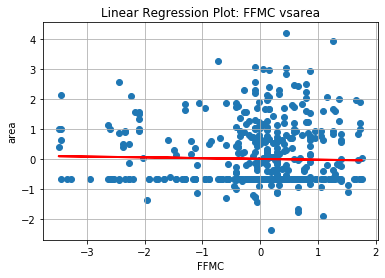

In [184]:
plot_linear_regression_model(regression_df, 'FFMC', 'area')

#### 1.2.2) DMC

Intercept: -0.00000
Slope : 0.04602


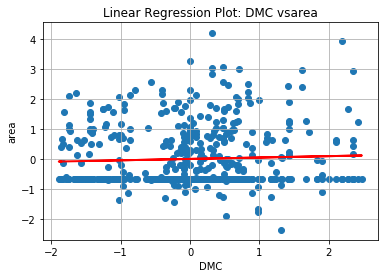

In [185]:
plot_linear_regression_model(regression_df, 'DMC', 'area')

#### 1.2.3) DC

Intercept: -0.00000
Slope : 0.04001


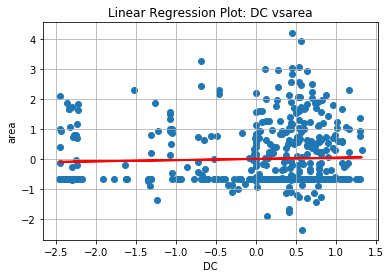

In [186]:
plot_linear_regression_model(regression_df, 'DC', 'area')

#### 1.2.4) ISI

Intercept: -0.00000
Slope : -0.02340


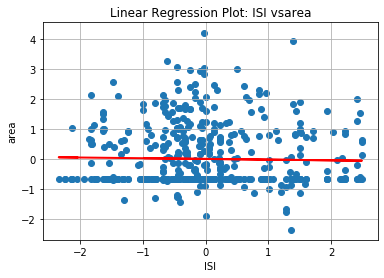

In [187]:
plot_linear_regression_model(regression_df, 'ISI', 'area')

#### 1.2.5) temp

Intercept: -0.00000
Slope : 0.07612


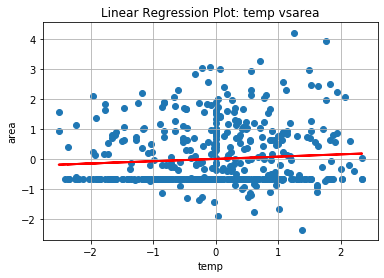

In [188]:
plot_linear_regression_model(regression_df, 'temp', 'area')

#### 1.2.6) RH

Intercept: -0.00000
Slope : -0.02931


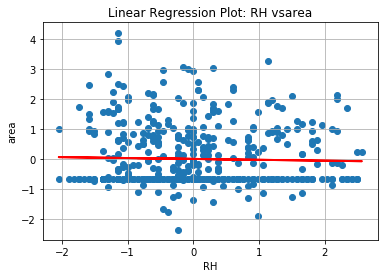

In [189]:
plot_linear_regression_model(regression_df, 'RH', 'area')

#### 1.2.7) wind

Intercept: -0.00000
Slope : 0.03637


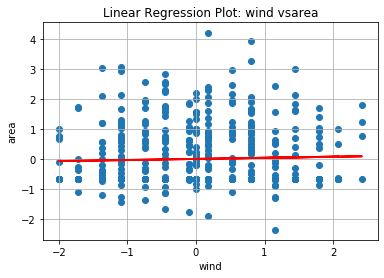

In [190]:
plot_linear_regression_model(regression_df, 'wind', 'area')

#### 1.2.8) rain

Intercept: -0.00000
Slope : -0.04848


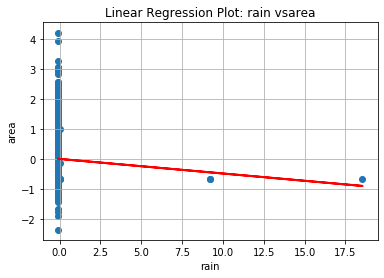

In [191]:
plot_linear_regression_model(regression_df, 'rain', 'area')

From plots above, seems like **rain** still have **two** outliers presents. The good thing is that we can remove the outliers from **FFMC** and **ISI** compared with the original data. We will try different techniques to improve this model.

### 1.3) Compute basic summary statistics , true coefficients and confidence intervals (by Bootstrap Method) for each features

In [192]:
# Define the target and features:
target_label = 'area'
feature_labels = [x for x in regression_df.columns if x not in [target_label]]

#### 1.3.1 ) Estimate of the true coefficients (slope)

In [347]:
# Estimate of the true coefficients of several features
for column in feature_labels:
    estimate_true_coefficients(regression_df, column, 'area')

Estimate True Coefficients of for Linear Regression of FFMC (Slope) and area (Intercept)
Intercept: 0.00000
Slope : -0.02591
----------------------------------------------------------------------------------------
Estimate True Coefficients of for Linear Regression of DMC (Slope) and area (Intercept)
Intercept: -0.00000
Slope : 0.04602
----------------------------------------------------------------------------------------
Estimate True Coefficients of for Linear Regression of DC (Slope) and area (Intercept)
Intercept: -0.00000
Slope : 0.04001
----------------------------------------------------------------------------------------
Estimate True Coefficients of for Linear Regression of ISI (Slope) and area (Intercept)
Intercept: -0.00000
Slope : -0.02340
----------------------------------------------------------------------------------------
Estimate True Coefficients of for Linear Regression of temp (Slope) and area (Intercept)
Intercept: -0.00000
Slope : 0.07612
----------------------

#### 1.3.2 ) Compute basic summary statistics by Bootstrap method

In [194]:
# Summary Statistic (bootstrap method) of several features
bootstrap_pop_means = []
bootstrap_pop_stds = []
for column in feature_labels:
    mean, std = compute_summary_statistics_bootstrap(regression_df.loc[:,column], column)
    bootstrap_pop_means.append(mean)
    bootstrap_pop_stds.append(std)

Summary Statistics (Bootstrap) of: FFMC
Estimated mean (-0.006) vs actual mean (0.000)
Estimated s.d. (0.147) vs actual s.d. (1.000)
-----------------------------------------------------
Summary Statistics (Bootstrap) of: DMC
Estimated mean (-0.003) vs actual mean (0.000)
Estimated s.d. (0.142) vs actual s.d. (1.000)
-----------------------------------------------------
Summary Statistics (Bootstrap) of: DC
Estimated mean (-0.009) vs actual mean (-0.000)
Estimated s.d. (0.134) vs actual s.d. (1.000)
-----------------------------------------------------
Summary Statistics (Bootstrap) of: ISI
Estimated mean (0.007) vs actual mean (0.000)
Estimated s.d. (0.136) vs actual s.d. (1.000)
-----------------------------------------------------
Summary Statistics (Bootstrap) of: temp
Estimated mean (0.009) vs actual mean (-0.000)
Estimated s.d. (0.134) vs actual s.d. (1.000)
-----------------------------------------------------
Summary Statistics (Bootstrap) of: RH
Estimated mean (-0.006) vs actu

#### 1.3.3 ) Compute confidence intervals for the above summary statistics by Bootstrap method

In [195]:
i = 0
for column in feature_labels: # loop through all the mean and sd value's arrays coomputed from the summary statistics section
    compute_confidence_intervals(regression_df.loc[:,column], bootstrap_pop_means[i], bootstrap_pop_stds[i], column)
    i += 1

95% Confident Intervals (Bootstrap) of: FFMC
The half width is 0.29
The actual mean is 0.00
The 0.95 level CI is (-0.29 , 0.28)
-----------------------------------------------------
95% Confident Intervals (Bootstrap) of: DMC
The half width is 0.28
The actual mean is 0.00
The 0.95 level CI is (-0.28 , 0.28)
-----------------------------------------------------
95% Confident Intervals (Bootstrap) of: DC
The half width is 0.26
The actual mean is -0.00
The 0.95 level CI is (-0.27 , 0.25)
-----------------------------------------------------
95% Confident Intervals (Bootstrap) of: ISI
The half width is 0.27
The actual mean is 0.00
The 0.95 level CI is (-0.26 , 0.27)
-----------------------------------------------------
95% Confident Intervals (Bootstrap) of: temp
The half width is 0.26
The actual mean is -0.00
The 0.95 level CI is (-0.25 , 0.27)
-----------------------------------------------------
95% Confident Intervals (Bootstrap) of: RH
The half width is 0.26
The actual mean is -0.00
T

### 1.4) Regression Model with All Features together

Intercept, Slopes : 
Intercept   -5.898060e-17
FFMC        -9.134521e-02
DMC          7.752961e-02
DC           2.561003e-02
ISI         -3.018059e-02
temp         6.625262e-02
RH          -3.084220e-02
wind         5.647892e-02
rain        -3.939083e-02
dtype: float64

Intercept t-value, Slope t-values: 
Intercept   -1.341194e-15
FFMC        -1.276482e+00
DMC          1.161582e+00
DC           4.792144e-01
ISI         -4.738373e-01
temp         1.153087e+00
RH          -5.847595e-01
wind         1.246232e+00
rain        -8.844732e-01
dtype: float64

Hypothesis test summary for each coefficient if they differ from zero:
Intercept    1.000000
FFMC         0.202369
DMC          0.245951
DC           0.631992
ISI          0.635819
temp         0.249417
RH           0.558969
wind         0.213254
rain         0.376859
dtype: float64

SSE, SST, SSR, and RMSE:
SSE: 9.087014922209619
SST: 517.0000000000002
SSR: 507.9129850777906
RMSE: 1.0657752414445563
                            OLS Regress

Text(0.5, 1.0, 'Residual Histogram')

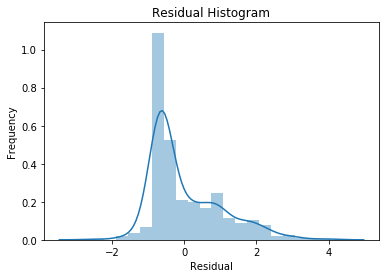

In [196]:
formula = 'area ~ FFMC + DMC + DC + ISI +'
formula += ' temp + RH + wind + rain'

ols_model = sm.ols(formula=formula + ' + 1', data=regression_df)

results = ols_model.fit()
n_points = regression_df.shape[0]
y_output = regression_df['area'].values.reshape(n_points, 1)

# Get predictions
y_pred = results.predict()
# Add predicted to pandas dataframe
regression_df['predicted'] = y_pred

# Get slope (m) and y-intercept (b)
print('Intercept, Slopes : \n{}'.format(results.params))

# Get the t-values (hypothesis test statistics) for linear regression coefficient hypothesis tests.
print('\nIntercept t-value, Slope t-values: \n{}'.format(results.tvalues))

# Get p-values for above t-value statistics
print('\nHypothesis test summary for each coefficient if they differ from zero:')
print(results.pvalues)

print('\nSSE, SST, SSR, and RMSE:')
mean_y = np.mean(y_output)
sst = np.sum((y_output - mean_y)**2)
sse = sst - results.ssr
print('SSE: {}'.format(sse))
print('SST: {}'.format(sst))
print('SSR: {}'.format(results.ssr))
print('RMSE: {}'.format(np.sqrt(results.mse_model)))

# Get most of the linear regression statistics we are interested in:
print(results.summary())

# Plot a histogram of the residuals
sns.distplot(results.resid, hist=True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram')

1. It is clear from the **OLS Regression Summary** that this model is **<font color=red>over-parameterized</font>**. Only the intercept is significant.
2. Examine the residual plots show that they are not in a standard normal distribution form. They are left-skew with approximate **means** equal to 0.
3. **Adjusted R-suqared = 0.002**: 2% of the variation in the output variable is explained by the input variables.
4. **Mean-Qquared Error (RMSE) = 1.0657752414445563**: 1.066 Hectare (Ha) is the square root of the average of squared differences between the prediction of burned area and your actual observation.
Note: 1 Hectare = 0.01 Square kilometer

**Summary:** The <font color=blue>**Mean-Qquared Error (RMSE)**</font> look not so much significant compared with the area range between 0.00 to 1090.84 from collected data. However, the <font color=blue>**Adjusted R-suqared**</font> is only **2%** and all of the features except the intercept are not significant (from p-value). 

This model is just to compute the average value of the label (area), but nothing more. I will improve this model through the **feature selection** and **regularization**.

### 1.5) Feature Selection using Principal Component Regression (PCR)

In [348]:
# One-hot encode inputs
regression_expanded = pd.get_dummies(regression_df, drop_first=True)
print('DataFrame one-hot-expanded shape: {}'.format(regression_expanded.shape))

# Get target and original x-matrix
y = regression_df[target_label]
X = regression_df.as_matrix(columns=feature_labels)

# PCR
pca = PCA(n_components=X.shape[1])
pca_result = pca.fit_transform(X)

column_names = ['pc' + str(ix+1) for ix in range(X.shape[1])]
pca_df = pd.DataFrame(data = pca_result, columns=column_names)
pca_df[target_label] = y

# View PCA on the first few rows
pca_df.head()

DataFrame one-hot-expanded shape: (517, 10)


,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,area
0,3.975243,-0.355221,2.053529,-1.016815,-0.016682,0.184881,0.543868,0.474830,-0.670954
1,0.743087,-0.255114,-1.701118,1.169640,-0.813434,-0.916327,-0.475552,-0.256915,-0.670954
2,0.943819,-0.010640,-1.361698,0.939172,-0.960993,-1.302903,-0.083141,-0.050739,-0.670954
3,2.076611,1.546774,5.856438,7.496268,0.434766,-0.724485,0.281945,-0.149791,-0.670954
4,2.125369,-0.453639,0.178056,0.811056,-2.269267,0.512431,0.136030,0.572892,-0.670954


                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.582
Date:                Sun, 19 Jan 2020   Prob (F-statistic):              0.164
Time:                        23:42:51   Log-Likelihood:                -729.62
No. Observations:                 517   AIC:                             1471.
Df Residuals:                     511   BIC:                             1497.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.898e-17      0.044  -1.34e-15      1.0

Text(0.5, 1.0, 'Residual Histogram')

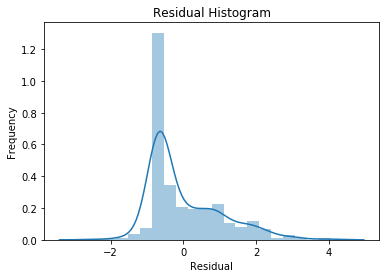

In [210]:
# Perform linear regression with the first N columns.
# Note: starting from N = 2 to 8, N = 5 yield the heighest result of Adjusted R-suqared
n = 5
formula_start = target_label + ' ~ '
formula_terms = ['pc' + str(x+1) for x in range(n)]
formula_end = ' + '.join(formula_terms)
formula_final = formula_start + formula_end

pcr_model = sm.ols(formula = formula_final, data=pca_df)

results = pcr_model.fit()

# Get most of the linear regression statistics we are interested in:
print(results.summary())

# Plot a histogram of the residuals
sns.distplot(results.resid, hist=True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram')

This model after **PCR** has improve a bit.
1. **Adjusted R-suqared = 0.006**: 6% of the variation in the output variable is explained by the input variables. Compared with the original model with all features, the **Adjusted R-suqared** has increased from **2%** to **6%**.
2. **pc5** has a small **p-value** which is **significant** aside from the intercept.

I will continue improving this model by **regularization** through a **Lasso Regression**.

### 1.6) Regularization with Lasso Regression

In [339]:
# Lasso Regression with a sequence of lambdas
# Generate a sequence of lambdas
area = regression_df.loc[:,'area']
log_lambda_seq = np.linspace(-6, 2, 50) # log sequence for lambda
lambda_seq = np.exp(log_lambda_seq)

coeffs_array = []
rsq_array = []
formula = 'area ~ FFMC + DMC + DC + ISI + temp + 1' # the formular from the PCA (5 features yield the best adjusted r-squared)

for lamb in lambda_seq:
    lasso_model = sm.ols(formula, data=regression_df).fit_regularized(method='elastic_net', alpha=lamb, L1_wt=1) # L1_wt=1 is lasso fit
    coeffs_array.append(list(lasso_model.params))
    predictions = lasso_model.fittedvalues
    residuals = [x - y for x, y in zip(np.squeeze(predictions), area)]

    SSR = np.sum(np.square(residuals))
    SST = np.sum(np.square(area - np.mean(area)))

    rsq = 1 - (SSR / SST)
    rsq_array.append(rsq)

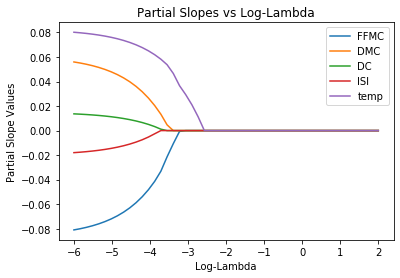

In [340]:
# Pull out partial slopes (drop intercept version)
beta_coeffs = [x[1:] for x in coeffs_array]
a = np.array(beta_coeffs)

# Plot the Partial Slopes vs Log-Lambda
plt.plot(log_lambda_seq, a[:,0], label='FFMC') # set label
plt.plot(log_lambda_seq, a[:,1], label='DMC') # set label
plt.plot(log_lambda_seq, a[:,2], label='DC') # set label
plt.plot(log_lambda_seq, a[:,3], label='ISI') # set label
plt.plot(log_lambda_seq, a[:,4], label='temp') # set label
plt.title('Partial Slopes vs Log-Lambda')
plt.ylabel('Partial Slope Values')
plt.xlabel('Log-Lambda')
plt.legend(loc="best")

> Notice that $\lambda$ increases, the values of the 5 model coefficients decrease toward zero. When all coefficients are zero, the model predicts all values of the label as zero! In other words, high values of $\lambda$ give highly biased solutions, but with very low variance. For small values of $\lambda$, the situation is just the opposite.

### 1.7) Evaluate Regression Model Performance

SSE: 6.41014114576592
SSR: 510.5898588542343
SST: 517.0000000000002
R-squared = 0.012398725620436979
RMSE: 0.04370645164764331


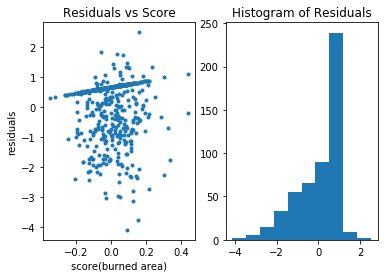

In [352]:
regression_df_vars = regression_df.loc[:,['FFMC', 'DMC','DC', 'ISI', 'temp']]
M = regression_df_vars.as_matrix()
area = regression_df.loc[:,'area']
beta_coeffs, resids, rank, s = np.linalg.lstsq(M,area)

area_predictions = np.dot(M, beta_coeffs) + np.mean(area)
area_resids = area_predictions - area

# Plot the residuals vs score (burned area)
plt.subplot(1, 2, 1)
plt.plot(area_predictions, area_resids, '.')
plt.ylabel('residuals')
plt.xlabel('score(burned area)')
plt.title('Residuals vs Score')

# Histogram of residuals
plt.subplot(1, 2, 2)
plt.hist(area_resids)
plt.title('Histogram of Residuals')

# R-squared
#              SSR
# R^2 = 1 -  -------
#              SST

SSR = np.sum(np.square(area_resids))
SST = np.sum(np.square(area - np.mean(area)))
SSE = SST - SSR

print('SSE: {}'.format(SSE))
print('SSR: {}'.format(SSR))
print('SST: {}'.format(SST))

R2 = 1.0 - (SSR / SST)
RMSE = np.sqrt(SSR)/len(regression_df) # SSR-squared/n

print('R-squared = {}'.format(R2))
print('RMSE: {}'.format(RMSE))

- From residual v.s. score scatter plot, we can see that the residuals are **homoscefastic** since they are kind of same across all groups of independent variables.
- From residual histogram plots, we can see that the that they are not in a standard normal distribution form. They are left-skew with approximate **means** equal to 0.
- The next step is to leverage **Naïve Bayes algorithm** to build a model from instead of to see if it's more accurate than this **Regression Model**.

## 2. <u>Naive Bayes Model:<u/>
### 2.1) Binning to convert numerical to categorical attributes

In order to leverage **Naïve Bayes algorithm** on this classification model, I need to convert those numeric attributes to categorical attributes. On this assignment, I'm particularly interested to see how these **Fire Weather index(FWI)** and other meteorological data doing for prediction. 

Below is the **Hazard Rating** 

| Hazard<br>Rating | FFMC<br>(Fine Fuel Moisture Code)  | DMC<br>(Duff Moisture Code) | DC<br>(Drought Code) | ISI<br>(Initial Spread Index) |
| --- | --- | --- | --- | --- |
| Low | 0-76 | 0-21 | 0-79 | 0-1.5|
| Moderate | 77-84 | 22-27 | 80-189 | 2-4 |
| High | 85-88 | 28-40 | 190-299 | 5-8 |
| Very High | 89-91 | 41-60 | 300-424 | 9-15 |
| Extreme | 92+ | 61+ | 425+ | 16+ |

<i>Source: https://wildfire.alberta.ca/wildfire-status/fire-weather/understanding-fire-weather.aspx</i>

I will bin those **Fire Weather index(FWI)** into its own **Hazard Rating**.

In [30]:
# Create new copy of original data used for Naive Bayes analysis
naive_bayes_df = forestfires_df.copy()

For **area**, as we can see from the following **Histogram** that majority of the burned area of forest fires are very skewed toward zero. The next bar after zero is about **50** which we can see some significant on it.

Therefore, on this assignment, I will binning the numerica area in two categories:
1. **area $<$ 50**
2. **area $\geq$ 50** 

Text(0, 0.5, 'Area (in Hectare)')

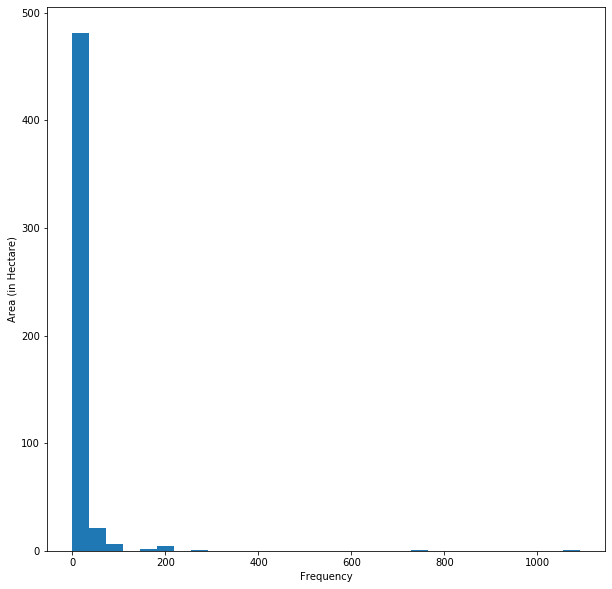

In [31]:
plt.figure(figsize=(10,10))
plt.hist(naive_bayes_df['area'], bins = 30)
plt.xlabel('Frequency')
plt.ylabel('Area (in Hectare)')

In [32]:
# Convert Numeric columns to Categorical columns
naive_bayes_df.loc[naive_bayes_df.loc[:, "FFMC"] < 77, "hz_rating_FFMC"] = "Low"
naive_bayes_df.loc[(naive_bayes_df.loc[:, "FFMC"] >= 77) & (naive_bayes_df.loc[:, "FFMC"] < 85), "hz_rating_FFMC"] = "Moderate"
naive_bayes_df.loc[(naive_bayes_df.loc[:, "FFMC"] >= 85) & (naive_bayes_df.loc[:, "FFMC"] < 89), "hz_rating_FFMC"] = "High"
naive_bayes_df.loc[(naive_bayes_df.loc[:, "FFMC"] >= 89) & (naive_bayes_df.loc[:, "FFMC"] < 92), "hz_rating_FFMC"] = "VeryHigh"
naive_bayes_df.loc[naive_bayes_df.loc[:, "FFMC"] >= 92, "hz_rating_FFMC"] = "Extreme"

naive_bayes_df.loc[naive_bayes_df.loc[:, "DMC"] < 22, "hz_rating_DMC"] = "Low"
naive_bayes_df.loc[(naive_bayes_df.loc[:, "DMC"] >= 22) & (naive_bayes_df.loc[:, "DMC"] < 28), "hz_rating_DMC"] = "Moderate"
naive_bayes_df.loc[(naive_bayes_df.loc[:, "DMC"] >= 28) & (naive_bayes_df.loc[:, "DMC"] < 41), "hz_rating_DMC"] = "High"
naive_bayes_df.loc[(naive_bayes_df.loc[:, "DMC"] >= 41) & (naive_bayes_df.loc[:, "DMC"] < 61), "hz_rating_DMC"] = "VeryHigh"
naive_bayes_df.loc[naive_bayes_df.loc[:, "DMC"] >= 61, "hz_rating_DMC"] = "Extreme"

naive_bayes_df.loc[naive_bayes_df.loc[:, "DC"] < 80, "hz_rating_DC"] = "Low"
naive_bayes_df.loc[(naive_bayes_df.loc[:, "DC"] >= 80) & (naive_bayes_df.loc[:, "DC"] < 190), "hz_rating_DC"] = "Moderate"
naive_bayes_df.loc[(naive_bayes_df.loc[:, "DC"] >= 190) & (naive_bayes_df.loc[:, "DC"] < 300), "hz_rating_DC"] = "High"
naive_bayes_df.loc[(naive_bayes_df.loc[:, "DC"] >= 300) & (naive_bayes_df.loc[:, "DC"] < 425), "hz_rating_DC"] = "VeryHigh"
naive_bayes_df.loc[naive_bayes_df.loc[:, "DC"] >= 425, "hz_rating_DC"] = "Extreme"

naive_bayes_df.loc[naive_bayes_df.loc[:, "ISI"] < 2, "hz_rating_ISI"] = "Low"
naive_bayes_df.loc[(naive_bayes_df.loc[:, "ISI"] >= 2) & (naive_bayes_df.loc[:, "ISI"] < 5), "hz_rating_ISI"] = "Moderate"
naive_bayes_df.loc[(naive_bayes_df.loc[:, "ISI"] >= 5) & (naive_bayes_df.loc[:, "ISI"] < 9), "hz_rating_ISI"] = "High"
naive_bayes_df.loc[(naive_bayes_df.loc[:, "ISI"] >= 9) & (naive_bayes_df.loc[:, "ISI"] < 16), "hz_rating_ISI"] = "VeryHigh"
naive_bayes_df.loc[naive_bayes_df.loc[:, "ISI"] >= 16, "hz_rating_ISI"] = "Extreme"

naive_bayes_df.loc[naive_bayes_df.loc[:, "area"] < 50, "area_range"] = "<50"
naive_bayes_df.loc[naive_bayes_df.loc[:, "area"] >= 50, "area_range"] = ">=50"

In [33]:
# Drop unused columns
Obsolete = ['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'area', 'count'], 
for x in Obsolete:
    naive_bayes_df = naive_bayes_df.drop(x, axis=1)
    
# Preview the data
naive_bayes_df.head()

,temp,RH,wind,rain,hz_rating_FFMC,hz_rating_DMC,hz_rating_DC,hz_rating_ISI,area_range
0,8.2,51,6.7,0.0,High,Moderate,Moderate,High,<50
1,18.0,33,0.9,0.0,VeryHigh,High,Extreme,High,<50
2,14.6,33,1.3,0.0,VeryHigh,VeryHigh,Extreme,High,<50
3,8.3,97,4.0,0.2,VeryHigh,High,Low,VeryHigh,<50
4,11.4,99,1.8,0.0,VeryHigh,VeryHigh,Moderate,VeryHigh,<50


### 2.2) Train and Test the Model
I decide to use **Laplace Smoothing** since is an effective way to deal with data sets which do not have sufficient samples to compute probabilities. This data set has only **517 records**.

In [35]:
# Convert our dataframe columns from string (object) to "category"
for c in naive_bayes_df.columns:
    if naive_bayes_df[c].dtype == 'object':
        naive_bayes_df[c] = naive_bayes_df[c].astype('category')

# Our label column
area_range_label_col = 'area_range'
area_range_labels = naive_bayes_df[area_range_label_col].cat.codes

print(naive_bayes_df.dtypes)
naive_bayes_df.head()

# Convert our categorical values to numeric feature vectors
features = []
for c in naive_bayes_df.columns:
    if c != area_range_label_col:
        if str(naive_bayes_df[c].dtype) == 'category': # converts categorical columns to numeric values
            features.append(naive_bayes_df[c].cat.codes)
        else:
           features.append(naive_bayes_df[c])
area_feature_vecs = np.array(features).T
area_feature_vecs

temp               float64
RH                   int64
wind               float64
rain               float64
hz_rating_FFMC    category
hz_rating_DMC     category
hz_rating_DC      category
hz_rating_ISI     category
area_range        category
dtype: object


array([[ 8.2, 51. ,  6.7, ...,  3. ,  3. ,  1. ],
       [18. , 33. ,  0.9, ...,  1. ,  0. ,  1. ],
       [14.6, 33. ,  1.3, ...,  4. ,  0. ,  1. ],
       ...,
       [21.2, 70. ,  6.7, ...,  4. ,  0. ,  2. ],
       [25.6, 42. ,  4. , ...,  0. ,  0. ,  4. ],
       [11.8, 31. ,  4.5, ...,  2. ,  3. ,  2. ]])

In [36]:
# Let check the area's category code
# 0 is area <50
# 1 is area >= 50
print(list(zip("0", naive_bayes_df.loc[naive_bayes_df[area_range_label_col].cat.codes == 0, "area_range"][:1])))
print(list(zip("1", naive_bayes_df.loc[naive_bayes_df[area_range_label_col].cat.codes == 1, "area_range"][:1])))

[('0', '<50')]
[('1', '>=50')]


In [37]:
# Create the Model
model = sklearn.naive_bayes.MultinomialNB(alpha=3)
model.fit(area_feature_vecs, area_range_labels)

MultinomialNB(alpha=3, class_prior=None, fit_prior=True)

In [38]:
# Look at the log conditional probabilities of being <50 (0) or >=50 (1) on each of these features
conditional_probas = pd.DataFrame(model.feature_log_prob_, columns=naive_bayes_df.columns[:-1])
conditional_probas

,temp,RH,wind,rain,hz_rating_FFMC,hz_rating_DMC,hz_rating_DC,hz_rating_ISI
0,-1.356400,-0.491589,-2.894598,-7.835234,-3.633067,-4.692418,-4.720155,-3.489053
1,-1.172757,-0.584017,-2.859461,-6.336590,-3.523179,-5.037307,-5.355760,-3.409850


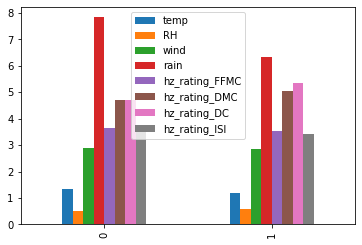

In [39]:
(-conditional_probas).plot(kind='bar')

### 2.3) Evaluate Naive Bayes Model Performance

In [42]:
# Get the preidctions & probabilities results from the model
predicted_area_range = model.predict(area_feature_vecs)
area_range_probabilities = model.predict_proba(area_feature_vecs)

# Compute Accuracy, Precision, Recall and Confusion Matrix
accuracy = sklearn.metrics.accuracy_score(area_range_labels, predicted_area_range)
precision = sklearn.metrics.precision_score(area_range_labels, predicted_area_range)
recall = sklearn.metrics.recall_score(area_range_labels, predicted_area_range)
print('Accuracy = %.3f, Precision = %.3f, Recall = %.3f' % (accuracy, precision, recall))
print('Confusion matrix:')
confusion_matrix(area_range_labels, predicted_area_range, 
                 naive_bayes_df[area_range_label_col].cat.categories)

Accuracy = 0.917, Precision = 0.087, Recall = 0.083
Confusion matrix:


,<50,>=50
<50,472,21
>=50,22,2


### 2.4) Changing Number of Features
Investigate the effect of adding more features to this naive Bayes model to find the best **feature selection** of our **Naive Bayes Model**.

In [43]:
# Convert our label (area_range) to numeric values
labels = naive_bayes_df[area_range_label_col].cat.codes

for num_features in [2, 3, 4, 5, 6, 7, 8]: # 2 - 8 features
    model.fit(area_feature_vecs[:, :num_features], labels)

    predicted_area_range = model.predict(area_feature_vecs[:, :num_features])

    print('Number of features = %d' % num_features)
    accuracy = sklearn.metrics.accuracy_score(labels, predicted_area_range)
    precision = sklearn.metrics.precision_score(labels, predicted_area_range)
    recall = sklearn.metrics.recall_score(labels, predicted_area_range)
    print('Accuracy = %.3f, Precision = %.3f, Recall = %.3f' % (accuracy, precision, recall))
    print('Confusion matrix:')
    print(confusion_matrix(labels, predicted_area_range, naive_bayes_df[area_range_label_col].cat.categories))
    print('')

Number of features = 2
Accuracy = 0.925, Precision = 0.000, Recall = 0.000
Confusion matrix:
      <50  >=50
<50   478    15
>=50   24     0

Number of features = 3
Accuracy = 0.925, Precision = 0.059, Recall = 0.042
Confusion matrix:
      <50  >=50
<50   477    16
>=50   23     1

Number of features = 4
Accuracy = 0.926, Precision = 0.000, Recall = 0.000
Confusion matrix:
      <50  >=50
<50   479    14
>=50   24     0

Number of features = 5
Accuracy = 0.930, Precision = 0.000, Recall = 0.000
Confusion matrix:
      <50  >=50
<50   481    12
>=50   24     0

Number of features = 6
Accuracy = 0.926, Precision = 0.000, Recall = 0.000
Confusion matrix:
      <50  >=50
<50   479    14
>=50   24     0

Number of features = 7
Accuracy = 0.921, Precision = 0.095, Recall = 0.083
Confusion matrix:
      <50  >=50
<50   474    19
>=50   22     2

Number of features = 8
Accuracy = 0.917, Precision = 0.087, Recall = 0.083
Confusion matrix:
      <50  >=50
<50   472    21
>=50   22     2



You can see from these results, that the model gains accuracy rapidly with just a few features. In fact, 3 of the 8 features provides equivalent results. 

However, we have to consider the **Precision** and **Recall** as well. **3 features** yield less **Precision** and **Recall** compared with **7** or **8 features** with not so much different in **Accuracy** rate.

## 3. <u>Choice of Model & Model Accuracy</u>

### 3.1) Regression Model Performance Summary
1. Examine the residual plots under the **Regression Model** on the last section show that they are not in a standard normal distribution form. They are left-skew with approximate **means** equal to 0.
2. After improving the model through **Principal Component Regression (PCR)** and **Lasso Regression**:
    - 2.1 **R-suqared = 0.012398725620436979**: 1.24% of the variation in the output variable is explained by the input variables.
    - 2.2 **Mean-Qquared Error (RMSE) = 0.04370645164764331**: 0.044 Hectare (Ha) is the square root of the average of squared differences between the prediction of burned area and your actual observation.
      Note: 1 Hectare = 0.01 Square kilometer
3. Eventhough the **Mean-Qquared Error (RMSE)** has reduced a lot after improving this model, we clearly see that this model isn't very good since the **R-suqared** is very low.

### 3.2) Naive Bayes Performance Summary
1. From **Confusion Matrix with Number of features = 7**: 
    - **True Positive = 2 (lower right)** and **True Negative = 474 (upper left)**
    - **False Negative (Type II error) = 22 (lower left)** and **False Positive (Type I error) = 19 (upper right)** 
    - **Note:** result varies on each run.
2. **Accuracy** We predict 9.21 out of 10 times correct. This is good sign.
3. **Precision** Since precision refers to the closeness of the measurements to each other, this mean each prediction will yeild the same result about +95% which is really good.
4. **Recall** for both class 0 (**area $<$ 50**) and class 1 (**area $\geq$ 50**) are pretty good which mean we have the useful proportion of both cases about +83% amoung the overall data.

### 3.3) Select choice of model
I will select the **Naive Bayes** model for this **Fire Forest Analysis** since the **Accuracy** is very high compared with the **R-suqared** of the **Regression Model** which is very low. I can say that this data isn't **Normal Distribution** from the residuals histogram plot (it's skwed) so the prediction isn't accurate and it's not the best way to do the **Linear Regression Model** with this data set.

## 4. <u>Conclusions</u>

Text(0, 0.5, 'Area (in Hectare)')

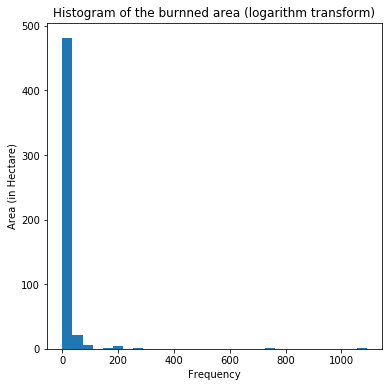

In [354]:
# Plot the original burned area of the forest fire data set
plt.figure(figsize=(6,6))
plt.hist(forestfires_df['area'], bins = 30)
plt.title('Histogram of the burnned area (logarithm transform)')
plt.xlabel('Frequency')
plt.ylabel('Area (in Hectare)')

We clearly see from the above histogram of the original **area** of the forest fire data set that it's very skewed toward zero. 

As the original intension was to model this as a **regression task** where the goal was to predict the burned area. After applied many improving techniques sucg as **feature selection** through the **PCR** and **regularization** through the **lasso regression**, we clearly see that the regression model isn't suited for this analysis.

The proposed model is to use **Naive Bayes** model to make the prediction of the burned area. However, we also see that it has a lower predictive accuracy for the large fires **(area >=50)** while the predictive accuracy for the small fires **(area <50)** is much higher. From the above histogram, this data set has more data for the small fires that's why the model can predict better in such as case.

To improve it, I believe that additional information (not available in this data set) is required, such as the type of trees and geography attributes such as type of soils,..etc. Also, since the large fires are rare event, outlier detection technique need to be address as well.

Nevertheless, the proposed model is still useful to improve firefighting resource management. For instance, when small fires are predicted then air tankers could be spared and small ground crews could be sent. Such management would be particularly advantageous in dramatic fire seasons, when simultaneous fires occur at distinct locations.